In [18]:
import numpy as np
import pandas as pd
import re 
import emoji
from nltk.stem import PorterStemmer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [19]:
data = pd.read_csv('../input/twitter-airline-sentiment/Tweets.csv')

In [20]:
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [21]:
confidence_threshold = 0.6

data.query("airline_sentiment_confidence < @confidence_threshold")

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
114,569861209781989377,positive,0.3482,NaN,0.0,Virgin America,NaN,AdamJdubs,NaN,0,@VirginAmerica come back to #PHL already. We n...,NaN,2015-02-23 06:07:54 -0800,Earth,Eastern Time (US & Canada)
142,569615109363929088,neutral,0.3550,NaN,0.0,Virgin America,NaN,FiDiFamilies,NaN,0,@VirginAmerica Can you find us a flt out of LA...,NaN,2015-02-22 13:49:59 -0800,New York City,Eastern Time (US & Canada)
183,569318130356502528,positive,0.3579,NaN,0.0,Virgin America,NaN,miaerolinea,NaN,0,😎 RT @VirginAmerica: You’ve met your match. Go...,NaN,2015-02-21 18:09:54 -0800,Worldwide,Caracas
309,568800805475782656,neutral,0.3750,NaN,0.0,Virgin America,NaN,GabriellaDago,NaN,0,@VirginAmerica is saving my sanity right now: ...,NaN,2015-02-20 07:54:14 -0800,New York City,Eastern Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14261,569644637343711232,positive,0.3642,NaN,0.0,American,NaN,jkhoey,NaN,1,@AmericanAir shoutout to the agent on duty now...,NaN,2015-02-22 15:47:19 -0800,"New York, NY",Eastern Time (US & Canada)
14297,569640847119163394,positive,0.3611,NaN,0.0,American,NaN,lmaxwell11,NaN,0,@AmericanAir Haha I had a boarding pass for 12...,NaN,2015-02-22 15:32:16 -0800,O.K.C.,Central Time (US & Canada)
14414,569619752399667200,neutral,0.3367,NaN,0.0,American,NaN,natnicc,NaN,0,@AmericanAir flight 1041 is the first flight.,NaN,2015-02-22 14:08:26 -0800,NaN,NaN
14530,569603962233622528,positive,0.3646,NaN,0.0,American,NaN,agirlnamedfrank,NaN,0,@AmericanAir thanks for forcing me to check -i...,NaN,2015-02-22 13:05:41 -0800,Brooklyn,Eastern Time (US & Canada)


In [22]:
data = data.drop(data.query("airline_sentiment_confidence < @confidence_threshold").index, axis=0).reset_index(drop=True)

In [23]:
tweets_df = pd.concat([data['text'], data['airline_sentiment']], axis=1)
tweets_df

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica I didn't today... Must mean I n...,neutral
2,@VirginAmerica it's really aggressive to blast...,negative
3,@VirginAmerica and it's a really big bad thing...,negative
4,@VirginAmerica seriously would pay $30 a fligh...,negative
...,...,...
14397,@AmericanAir right on cue with the delays👌,negative
14398,@AmericanAir leaving over 20 minutes Late Flig...,negative
14399,@AmericanAir Please bring American Airlines to...,neutral
14400,"@AmericanAir you have my money, you change my ...",negative


In [24]:
tweets_df.isna().sum()

text                 0
airline_sentiment    0
dtype: int64

In [25]:
tweets_df['airline_sentiment'].value_counts()

negative    9113
neutral     2997
positive    2292
Name: airline_sentiment, dtype: int64

In [26]:
sentiment_ordering = ['negative', 'neutral', 'positive']

tweets_df['airline_sentiment'] = tweets_df['airline_sentiment'].apply(lambda x: sentiment_ordering.index(x))

In [27]:
tweets_df

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,1
1,@VirginAmerica I didn't today... Must mean I n...,1
2,@VirginAmerica it's really aggressive to blast...,0
3,@VirginAmerica and it's a really big bad thing...,0
4,@VirginAmerica seriously would pay $30 a fligh...,0
...,...,...
14397,@AmericanAir right on cue with the delays👌,0
14398,@AmericanAir leaving over 20 minutes Late Flig...,0
14399,@AmericanAir Please bring American Airlines to...,1
14400,"@AmericanAir you have my money, you change my ...",0


In [28]:
emoji.demojize('@AmericanAir right on cue with the delays👌')

'@AmericanAir right on cue with the delays:OK_hand:'

In [29]:
ps = PorterStemmer()

def process_tweet(tweet):
    new_tweet = tweet.lower()
    new_tweet = re.sub(r'@\w+', '', new_tweet) # Remove @s
    new_tweet = re.sub(r'#', '', new_tweet) # Remove hashtags
    new_tweet = re.sub(r':', ' ', emoji.demojize(new_tweet)) # Turn emojis into words
    new_tweet = re.sub(r'http\S+', '',new_tweet) # Remove URLs
    new_tweet = re.sub(r'\$\S+', 'dollar', new_tweet) # Change dollar amounts to dollar
    new_tweet = re.sub(r'[^a-z0-9\s]',  '', new_tweet) # Remove punctuation
    new_tweet = re.sub(r'[0-9]+', 'number', new_tweet) # Change number values to number
    new_tweet = new_tweet.split(" ")
    new_tweet = list(map(lambda x: ps.stem(x), new_tweet)) # Stemming the words
    new_tweet = list(map(lambda x: x.strip(), new_tweet)) # Stripping whitespace from the words
    if '' in new_tweet:
        new_tweet.remove('')
    return new_tweet

In [30]:
ps.stem('watching')

'watch'

In [31]:
tweets = tweets_df['text'].apply(process_tweet)

labels = np.array(tweets_df['airline_sentiment'])

In [32]:
tweets

0                                           [what, , said]
1        [i, didnt, today, must, mean, i, need, to, tak...
2        [it, realli, aggress, to, blast, obnoxi, enter...
3         [and, it, a, realli, big, bad, thing, about, it]
4        [serious, would, pay, dollar, a, flight, for, ...
                               ...                        
14397           [right, on, cue, with, the, delay, hand, ]
14398    [leav, over, number, minut, late, flight, no, ...
14399    [pleas, bring, american, airlin, to, blackberr...
14400    [you, have, my, money, you, chang, my, flight,...
14401    [we, have, number, ppl, so, we, need, number, ...
Name: text, Length: 14402, dtype: object

In [33]:
# Get size of vocabulary
vocabulary = set()

for tweet in tweets: 
    for word in tweet:
        if word not in vocabulary:
            vocabulary.add(word)

vocab_length = len(vocabulary)

# Get max length of a sequence
max_seq_length = 0

for tweet in tweets:
    if len(tweet) > max_seq_length:
        max_seq_length = len(tweet)

# Print results
print("Vocab length:", vocab_length)
print("Max sequence length:", max_seq_length)

Vocab length: 11251
Max sequence length: 90


In [34]:
tokenizer = Tokenizer(num_words=vocab_length)
tokenizer.fit_on_texts(tweets)

sequences = tokenizer.texts_to_sequences(tweets)

word_index = tokenizer.word_index

model_inputs = pad_sequences(sequences, maxlen=max_seq_length, padding='post')

In [35]:
#sequences

In [36]:
word_index

{'to': 1,
 '': 2,
 'the': 3,
 'number': 4,
 'i': 5,
 'flight': 6,
 'a': 7,
 'you': 8,
 'for': 9,
 'on': 10,
 'and': 11,
 'my': 12,
 'is': 13,
 'in': 14,
 'it': 15,
 'of': 16,
 'your': 17,
 'me': 18,
 'have': 19,
 'that': 20,
 'thank': 21,
 'get': 22,
 'wa': 23,
 'not': 24,
 'with': 25,
 'at': 26,
 'no': 27,
 'be': 28,
 'thi': 29,
 'but': 30,
 'from': 31,
 'hour': 32,
 'http': 33,
 'can': 34,
 'are': 35,
 'cancel': 36,
 'we': 37,
 'help': 38,
 'now': 39,
 'do': 40,
 'servic': 41,
 'an': 42,
 'delay': 43,
 'time': 44,
 'just': 45,
 'custom': 46,
 'so': 47,
 'been': 48,
 'what': 49,
 'will': 50,
 'call': 51,
 'im': 52,
 'bag': 53,
 'wait': 54,
 'up': 55,
 'plane': 56,
 'out': 57,
 'fli': 58,
 'they': 59,
 'our': 60,
 'hold': 61,
 'need': 62,
 'us': 63,
 'when': 64,
 'how': 65,
 'amp': 66,
 'go': 67,
 'there': 68,
 'if': 69,
 'all': 70,
 'whi': 71,
 'cant': 72,
 'tri': 73,
 'still': 74,
 'one': 75,
 'pleas': 76,
 'airlin': 77,
 'would': 78,
 'day': 79,
 'gate': 80,
 'flightl': 81,
 'back':

In [37]:
model_inputs #after padding

array([[  49,    2,  218, ...,    0,    0,    0],
       [   5,  191,  102, ...,    0,    0,    0],
       [  15,  138, 2841, ...,    0,    0,    0],
       ...,
       [  76,  507,  435, ...,    0,    0,    0],
       [   8,   19,   12, ...,    0,    0,    0],
       [  37,   19,    4, ...,    0,    0,    0]], dtype=int32)

In [38]:
model_inputs.shape

(14402, 90)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(model_inputs, labels, train_size=0.7, random_state=22)


User settings:

   KMP_AFFINITY=granularity=fine,noverbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER

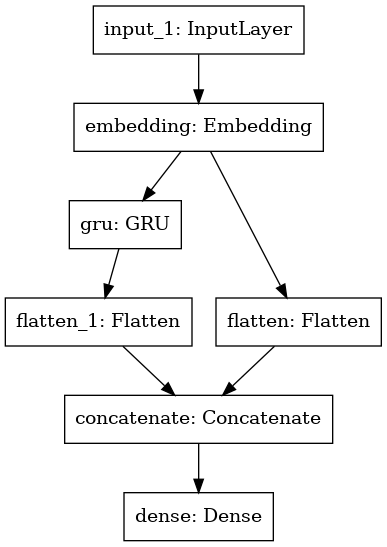

In [40]:
embedding_dim = 32

inputs = tf.keras.Input(shape=(max_seq_length,))

embedding = tf.keras.layers.Embedding(
    input_dim=vocab_length,
    output_dim=embedding_dim,
    input_length=max_seq_length
)(inputs)


# Model A (just a Flatten layer)
flatten = tf.keras.layers.Flatten()(embedding)

# Model B (GRU with a Flatten layer)
gru = tf.keras.layers.GRU(units=embedding_dim)(embedding)
gru_flatten = tf.keras.layers.Flatten()(gru)

# Both A and B are fed into the output
concat = tf.keras.layers.concatenate([flatten, gru_flatten])

outputs = tf.keras.layers.Dense(3, activation='softmax')(concat)


model = tf.keras.Model(inputs, outputs)

tf.keras.utils.plot_model(model)

In [41]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


batch_size = 32
epochs = 100

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,    
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True,
            verbose=1
        ),
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/100
252/252 [==============================] - 23s 85ms/step - loss: 0.7934 - accuracy: 0.6626 - val_loss: 0.6729 - val_accuracy: 0.7134
Epoch 2/100
252/252 [==============================] - 21s 83ms/step - loss: 0.5262 - accuracy: 0.7915 - val_loss: 0.5430 - val_accuracy: 0.7824
Epoch 3/100
252/252 [==============================] - 20s 79ms/step - loss: 0.3737 - accuracy: 0.8679 - val_loss: 0.5096 - val_accuracy: 0.7967
Epoch 4/100
252/252 [==============================] - 20s 81ms/step - loss: 0.2785 - accuracy: 0.9050 - val_loss: 0.5054 - val_accuracy: 0.8047
Epoch 5/100
252/252 [==============================] - 22s 86ms/step - loss: 0.2111 - accuracy: 0.9339 - val_loss: 0.5167 - val_accuracy: 0.8032
Epoch 6/100
252/252 [==============================] - 20s 80ms/step - loss: 0.1605 - accuracy: 0.9550 - val_loss: 0.5364 - val_accuracy: 0.8061
Epoch 7/100
252/252 [==============================] - 21s 84ms/step - loss: 0.1229 - accuracy: 0.9701 - val_loss: 0.5574 - val_ac

In [42]:
model.evaluate(X_test, y_test)

136/136 [==============================] - 5s 35ms/step - loss: 0.4937 - accuracy: 0.8007


[0.4937087893486023, 0.8007405400276184]